In [425]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

№1.3.1 Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве

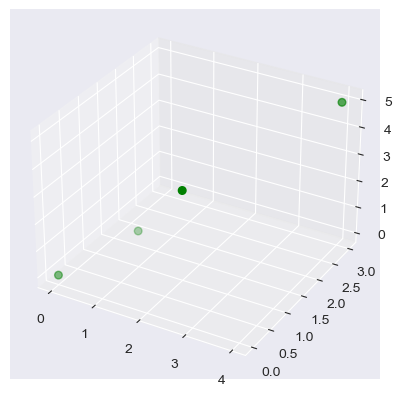

In [426]:
point1, point2 = np.array([0, 0, 0]), np.array([1, 1, 1])
point3, point4 = np.array([4, 3, 5]), np.array([2, 1, 3])
x = [0, 1, 4, 2]
y = [0, 1, 3, 1]
z = [0, 1, 5, 3]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=30, c='g')
plt.show()

In [427]:
print(f"Евклидово расстояние между (0, 0, 0) и (1, 1, 1): "
      f"{np.linalg.norm(point1 - point2).round(2)}")
print(f"Квадрат Евклидова расстояния между (1, 1 ,1) и (4, 3, 5): "
      f"{(np.linalg.norm(point2 - point3) ** 2).round(2)}")
print(f"Расстояние Чебышева между (4, 3, 5) и (2, 1, 3): "
      f"{np.linalg.norm(point3 - point4, ord=np.inf).round(2)}")
print(f"Расстояние Хемминга между (0, 0, 0) и (2, 1, 3): "
      f"{np.linalg.norm(point1 - point4, ord=1).round(2)}")

Евклидово расстояние между (0, 0, 0) и (1, 1, 1): 1.73
Квадрат Евклидова расстояния между (1, 1 ,1) и (4, 3, 5): 29.0
Расстояние Чебышева между (4, 3, 5) и (2, 1, 3): 2.0
Расстояние Хемминга между (0, 0, 0) и (2, 1, 3): 6.0


№1.3.2 Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.

In [428]:
matrix = np.zeros((5, 5))
matrix += np.arange(5)
print(matrix)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


№2.3.1 Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.


In [429]:
data = sns.load_dataset('iris')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [430]:
X_train, X_test, y_train, y_test = train_test_split(
      data.iloc[:, :-1], data.species, test_size=0.15)

k_model1 = KNeighborsClassifier(n_neighbors=1)
k_model5 = KNeighborsClassifier(n_neighbors=5)
k_model10 = KNeighborsClassifier(n_neighbors=10)
k_model1.fit(X_train, y_train)
k_model5.fit(X_train, y_train)
k_model10.fit(X_train, y_train)

k_model1_predicts = k_model1.predict(X_test)
k_model5_predicts = k_model5.predict(X_test)
k_model10_predicts = k_model10.predict(X_test)

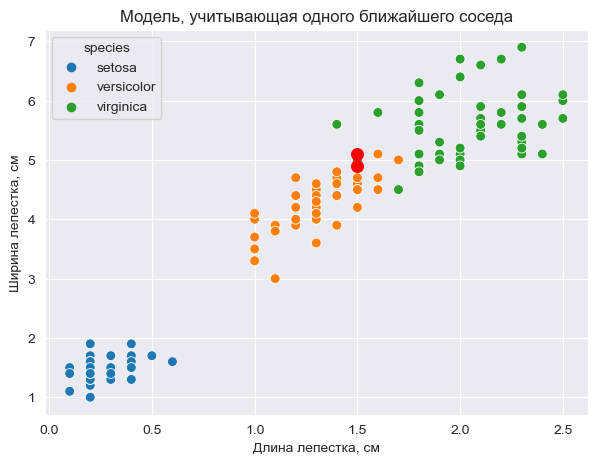

Точность предсказаний модели: 0.913


In [431]:
plt.figure(figsize=(7, 5))
plt.title("Модель, учитывающая одного ближайшего соседа")
sns.scatterplot(data=data, x="petal_width", y="petal_length", hue="species", s=50)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")

for i in range(len(y_test)):
    if np.array(y_test)[i] != k_model1_predicts[i]:
          plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], c='r', s=70)

plt.show()

print(f"Точность предсказаний модели: {accuracy_score(y_test, k_model1_predicts).round(3)}")

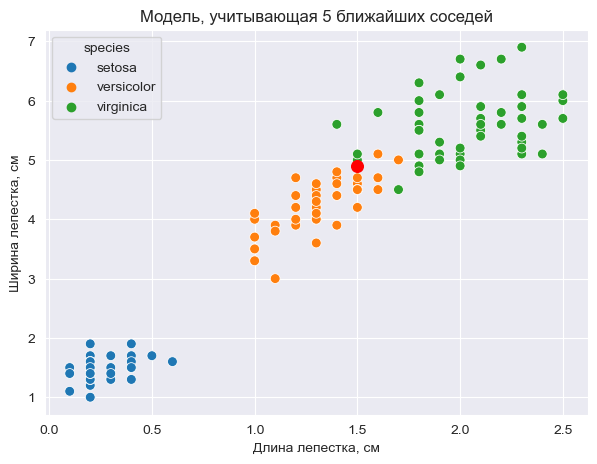

Точность предсказаний модели: 0.957


In [432]:
plt.figure(figsize=(7, 5))
plt.title("Модель, учитывающая 5 ближайших соседей")
sns.scatterplot(data=data, x="petal_width", y="petal_length", hue="species", s=50)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")

for i in range(len(y_test)):
    if np.array(y_test)[i] != k_model5_predicts[i]:
          plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], c='r', s=70)

plt.show()

print(f"Точность предсказаний модели: {accuracy_score(y_test, k_model5_predicts).round(3)}")

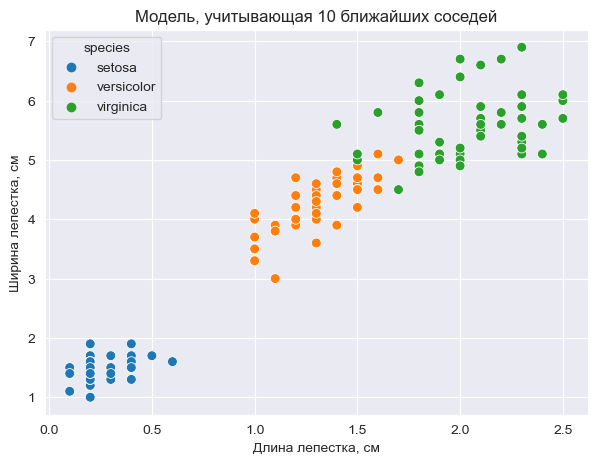

Точность предсказаний модели: 1.0


In [433]:
plt.figure(figsize=(7, 5))
plt.title("Модель, учитывающая 10 ближайших соседей")
sns.scatterplot(data=data, x="petal_width", y="petal_length", hue="species", s=50)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")

for i in range(len(y_test)):
    if np.array(y_test)[i] != k_model10_predicts[i]:
          plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], c='r', s=70)

plt.show()

print(f"Точность предсказаний модели: {accuracy_score(y_test, k_model10_predicts).round(3)}")

Как видно из графиков, для конкретной выборки Accuracy(k=1) < Accuracy(k=5) < Accuracy(k=10), т.е 
оптимальным значением k: k ∈ {1, 5, 10}, является 10, но если попробовать изменить обучающую и 
тестовые выборки, то и результат может отличаться => можно сделать вывод о важности подбора 
корректного k для разных случаев 

№3.3.2 Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и 
конвертируйте его в матрицу признаков.

In [435]:
data = {
    'eye_color': ['blue', 'brown', 'green', 'brown', 'blue'],
    'gender': ['male', 'female', 'male', 'male', 'female'],
    'salary': [100000, 50000, 70000, 150000, 300000]
}
df = pd.DataFrame(data)

eye_color_dict = {'blue': 0, 'brown': 1, 'green': 2}
gender_dict = {'male': 0, 'female': 1}

df.replace({'eye_color': eye_color_dict, 'gender': gender_dict}, inplace=True)

feature_matrix = np.matrix(df.values)

print(feature_matrix)

[[     0      0 100000]
 [     1      1  50000]
 [     2      0  70000]
 [     1      0 150000]
 [     0      1 300000]]
